In [1]:
"""
CNN 기반 유명 네트워크
1) LeNet (1, 2,...,5)
-CNN 단군할아버지
2) AlexNet
3) VGGNet
-VGG-(F, M, S), VGG16, VGG19...
"""

'\nCNN 기반 유명 네트워크\n1) LeNet (1, 2,...,5)\n-CNN 단군할아버지\n2) AlexNet\n3) VGGNet\n-VGG-(F, M, S), VGG16, VGG19...\n'

In [2]:
import tensorflow

In [6]:
from tensorflow.keras.applications.vgg16 
import VGG16, decode_predictions

In [7]:
vgg=VGG16()
vgg.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 64373286793e3c8b2b4e3219cbf3544b so we will re-download the data.
553467904/553467096 [==============================] - 140s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_____________________________________________

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [9]:
fashion_mnist=keras.datasets.fashion_mnist
(trainImages, trainLabels),(testImages, testLabels)=fashion_mnist.load_data()

In [10]:
classNames=['T-shirt', 'Trouser', 'Pullover',
           'Dress', 'Coat', 'Sandal','Shirt',
           'Sneaker','Bag','Ankle boot']

In [11]:
trainLabels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
trainImages.shape
trainLabels.shape #0~9
testImages.shape
testLabels #0~9

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

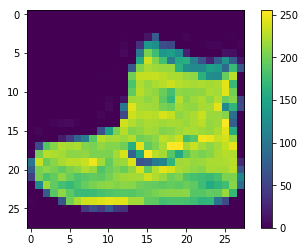

9

In [22]:
plt.figure()
plt.imshow(trainImages[0])
plt.colorbar()
plt.show()
trainLabels[0]

In [23]:
trainImages=trainImages/255.0
testImages=testImages/255.0

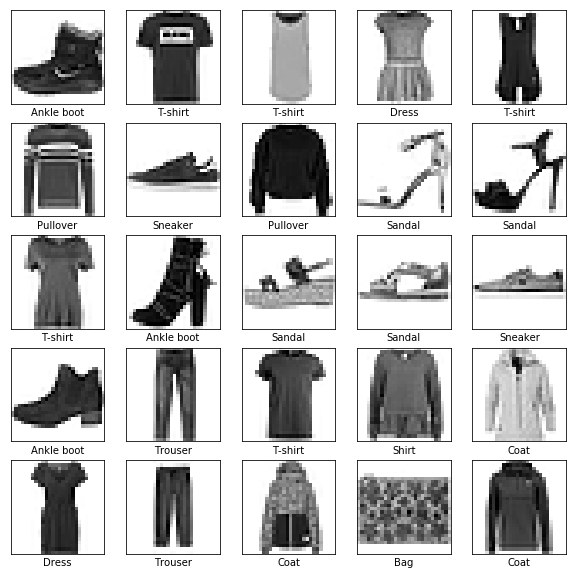

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainImages[i],cmap=plt.cm.binary)
    plt.xlabel(classNames[trainLabels[i]])
plt.show()

In [28]:
from keras.layers import *

In [33]:
model=keras.Sequential()

In [40]:
model.add(Flatten(input_shape=(28,28)))
#Flatten:28*28(2차원배열)->784픽셀(1차원배열)
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [46]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [47]:
model.fit(trainImages, trainLabels, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 8s 130us/step - loss: 0.2815 - accuracy: 0.8949
Epoch 2/5
60000/60000 [==============================] - 7s 123us/step - loss: 0.2666 - accuracy: 0.9012
Epoch 3/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.2585 - accuracy: 0.9030
Epoch 4/5
60000/60000 [==============================] - 7s 124us/step - loss: 0.2459 - accuracy: 0.9090
Epoch 5/5
60000/60000 [==============================] - 7s 123us/step - loss: 0.2374 - accuracy: 0.9109


In [43]:
# 1.층 설정(Sequential, Dense,...)
# 2.모델 설정(model.compile(opt, loss, met))
# 3.모델 훈련(fit)
# 4.평가(evaluate)
testLoss,testAcc=model.evaluate(
    testImages,testLabels)
print(testAcc)

10000/10000 [==============================] - 1s 52us/step
0.8754000067710876


In [52]:
pre=model.predict(testImages)

In [55]:
classNames[np.argmax(pre[0])]

'Ankle boot'

In [ ]:
#오후 연습문제
"""
1.
예측이미지 / 실제이미지 많이 틀린 이미지 출력
부츠(0)  신발 : 3
티셔츠 신발 : 5
...
(9)    신발

정답 : 신발, 예측을 잘못한 모든 케이스에 대해
어떤 예측으로 했는지 출력(최대값)

2.
fashion mnist 구현(신경망) -> CNN

3.
비행기 인식


"""

In [93]:
from PIL import Image

In [94]:
img=np.array(Image.open("cat.jpg").resize((224,224)))

In [90]:
yhat=vgg.predict(img.reshape(-1,224,224,3))

In [91]:
labelIdx=np.argmax(yhat)

In [92]:
label=decode_predictions(yhat)
print("예상 품종: ",label[0][0][1])
print("확률:",label[0][0][2])

예상 품종:  pillow
확률: 0.24155335


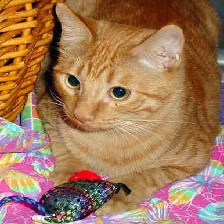

In [95]:
Image.open("cat.jpg").resize((224,224))

In [96]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'dog.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

Predicted: [('n02111889', 'Samoyed', 0.82047045), ('n02112018', 'Pomeranian', 0.1117461), ('n02112350', 'keeshond', 0.02351538)]
